In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv")

# Preview the data
print(df.head())
print(df.info())


   age        income  count  target
0   56  25903.305196      6       1
1   69  53051.954538      2       0
2   46  38654.738821      3       0
3   32  28666.194356      3       0
4   60  40301.406736      6       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1000 non-null   int64  
 1   income  1000 non-null   float64
 2   count   1000 non-null   int64  
 3   target  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB
None


In [4]:
# Drop rows with missing values (if minimal)
df.dropna(inplace=True)

# OR impute missing numeric values
df.fillna(df.mean(), inplace=True)


In [7]:
X = df.drop('target', axis=1)
y = df['target']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("dataset.csv")

# Features and target
X = df[['age', 'income', 'count']]
y = df['target']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5].values


(array([[-0.93751535, -0.80210531,  2.41494217],
        [-0.73694156,  0.94970892,  0.62830185],
        [ 0.93450674,  1.09914149,  1.22384862],
        [-1.27180501,  0.47801652,  0.62830185],
        [-0.60322569, -0.92636861, -0.5627917 ]]),
 array([1, 0, 1, 0, 0], dtype=int64))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.465,0.477941,0.643564,0.548523
1,Logistic Regression,0.480,0.487603,0.584158,0.531532
2,Decision Tree,0.490,0.494845,0.475248,0.484848
3,Random Forest,0.475,0.480000,0.475248,0.477612
4,Gradient Boosting,0.450,0.452632,0.425743,0.438776


In [14]:
# hyperparameter training
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5]
    }
}

# Reuse model dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Run GridSearchCV and collect results
best_models = []

for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    y_pred = grid.predict(X_test_scaled)
    
    best_models.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert to DataFrame
import pandas as pd
tuned_results_df = pd.DataFrame(best_models).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

# Display
from IPython.display import display
display(tuned_results_df)


Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning SVM...
Tuning Gradient Boosting...


,Model,Best Params,Accuracy,Precision,Recall,F1 Score
0,SVM,"{'C': 0.1, 'kernel': 'rbf'}",0.495,0.500000,0.900990,0.643110
1,Decision Tree,"{'max_depth': 3, 'min_samples_split': 10}",0.490,0.496644,0.732673,0.592000
2,Logistic Regression,"{'C': 0.01, 'solver': 'lbfgs'}",0.460,0.472868,0.603960,0.530435
3,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.460,0.466019,0.475248,0.470588
4,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.475,0.478723,0.445545,0.461538


Matplotlib is building the font cache; this may take a moment.
C:\Users\Manorath Meshram\AppData\Local\Temp\ipykernel_22088\1453883526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score", data=tuned_results_df, palette="viridis")


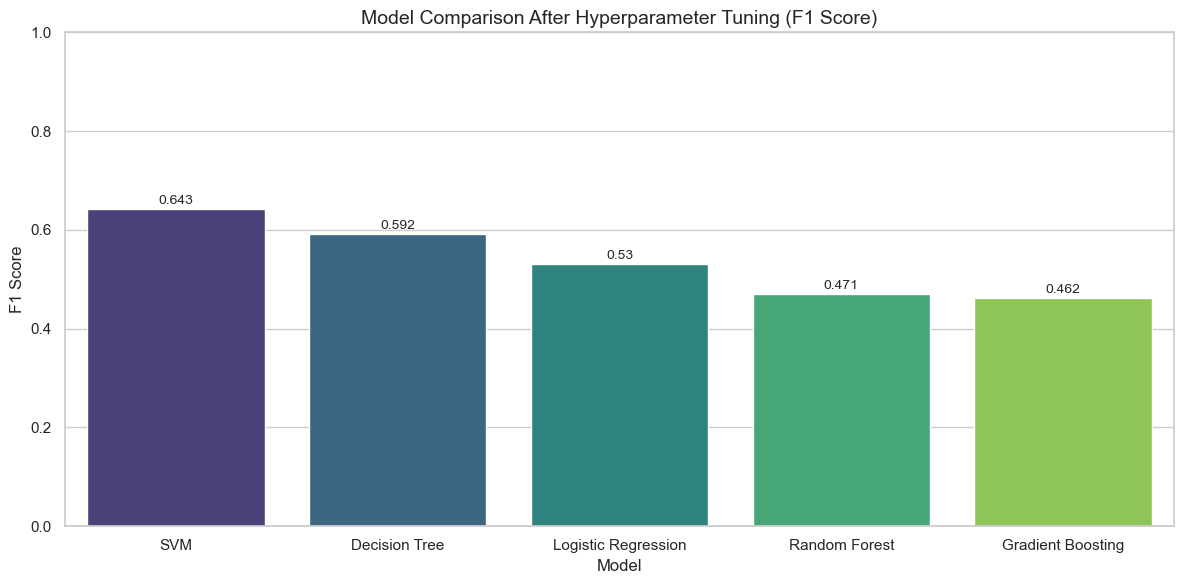

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot F1 Score comparison
sns.barplot(x="Model", y="F1 Score", data=tuned_results_df, palette="viridis")

# Add labels and title
plt.title("Model Comparison After Hyperparameter Tuning (F1 Score)", fontsize=14)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)

# Show values on bars
for index, row in tuned_results_df.iterrows():
    plt.text(index, row["F1 Score"] + 0.01, round(row["F1 Score"], 3), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


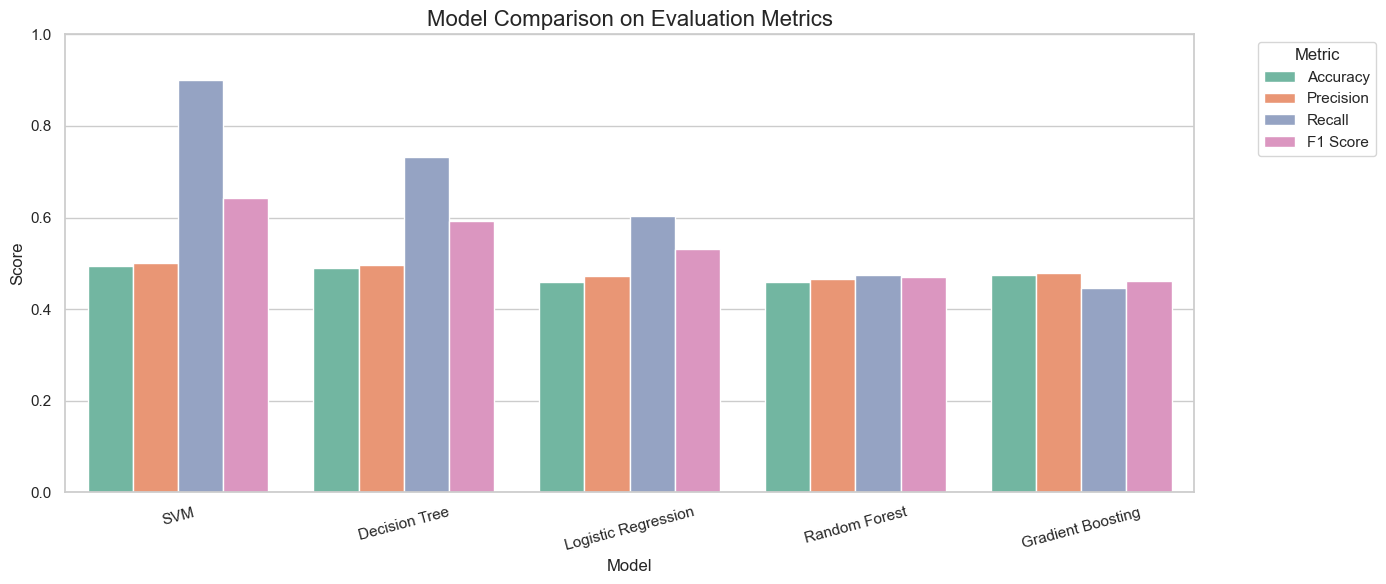

In [16]:
# Melt the DataFrame to long format for Seaborn
metrics_df = tuned_results_df.melt(
    id_vars="Model", 
    value_vars=["Accuracy", "Precision", "Recall", "F1 Score"], 
    var_name="Metric", 
    value_name="Score"
)

plt.figure(figsize=(14, 6))
sns.barplot(data=metrics_df, x="Model", y="Score", hue="Metric", palette="Set2")

plt.title("Model Comparison on Evaluation Metrics", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
